# 한 종목에 대한 analysis 진행

In [2]:
import pandas as pd
import numpy as np
from googletrans import Translator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import datetime
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('grade3')
translator = Translator()
sid = SentimentIntensityAnalyzer()

In [3]:
stock_data = pd.read_csv('stock_price.csv', index_col=0)
stock_data.index = pd.Series(stock_data.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
stock_data.head()

,A000270,A003490,A035720,A051910,A068270
date,,,,,
2017-06-07,38850.0,37400.0,108425.0,290500.0,96910.4
2017-06-08,39150.0,37500.0,108927.0,289500.0,97793.2
2017-06-09,39000.0,37950.0,110232.0,292500.0,99460.6
2017-06-12,38950.0,37200.0,105413.0,289500.0,98087.4
2017-06-13,39200.0,37300.0,107321.0,292500.0,97989.3


In [4]:
code = '035720'

In [5]:
article = pd.read_csv('labeled_with_content' + code + '.csv',index_col=0)
article.index = pd.Series(article.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [6]:
article.tail()

,title,Link,info,y_label,Contents
2017-06-07 08:23:00,"카카오, 하반기 실적 기대해도 좋다..투자의견·목표가 '상향'-동부",http://finance.naver.com/item/news_read.nhn?ar...,이데일리,0.0,동부증권은 7일 카카오035720에 대해 하반기 실적개선이 본격화될 것이라며 투자의...
2017-06-07 08:16:00,"""카카오, 각 사업부 실적 하반기부터 개선…투자의견·목표주가 상향"" -...",http://finance.naver.com/item/news_read.nhn?ar...,조선비즈,0.0,각 사업부 실적이 하반기부터 좋아질 것으로 기대된다며 투자의견을 보유에서 ‘매수’로...
2017-06-07 07:16:00,"카카오, 하반기 실적 기대 '목표가↑' - 동부",http://finance.naver.com/item/news_read.nhn?ar...,한국경제,0.0,대해 신규 광고상품 출시 등 하반기 광고매출 성장이 예상된다며 목표주가는 기존 9만...
2017-06-06 17:22:00,"[똑똑 tech] 카카오, 야심작 `서치라이트` 검색을 버리다",http://finance.naver.com/item/news_read.nhn?ar...,매일경제,0.0,이용자 호응 없어 중도하차카카오가 의욕적으로 선보인 모바일 특화 검색 서치라이트가 ...
2017-06-06 09:08:00,"""볼거리 보여주기도 기술""…네이버·카카오 AI로 취향을 연구하다",http://finance.naver.com/item/news_read.nhn?ar...,한국경제,0.0,개인 맞춤형 플랫폼 만든다뉴스는 기본 블로그 게시글·동영상 추천사진게티이미지뱅크 제...


In [7]:
article['2018-05-24 15:30' : '2018-05-25 15:30' ]

,title,Link,info,y_label,Contents
2018-05-25 09:49:00,지도앱 1위는 ‘구글’..1인당 사용시간 1위는 ‘카카오내비’,http://finance.naver.com/item/news_read.nhn?ar...,이데일리,0.0,구글과 네이버035420 텔레콤017670과 카카오035720가 4차 산업혁명의 기...
2018-05-25 04:03:00,"[빅데이터로 본 재테크] 카카오·멜론 합병, 엔터 지각변동에 쏠린 눈",http://finance.naver.com/item/news_read.nhn?ar...,매일경제,0.0,기대감 솔솔4차산업혁명 핵심 부품인 ·2차전지도 관심집중 지난 17일 카카오는 자회...
2018-05-24 16:09:00,"카카오, 블록체인 투자·지주社 '카카오G' 설립",http://finance.naver.com/item/news_read.nhn?ar...,이데일리,0.0,카카오035720가 올해 3월 글로벌 블록체인 사업 추진을 위한 투자·지주회사 ‘카...
2018-05-24 16:05:00,"비씨카드, '카카오T' 고객 대상 캐시백 이벤트",http://finance.naver.com/item/news_read.nhn?ar...,머니투데이,0.0,비씨카드는 카드사 단독으로 카카오모빌리티와 제휴를 맺고 ‘카카오 ’ 서비스 이용 고...


In [8]:
# 해당종목의 가격
close = stock_data['A' + code]

In [9]:
close.head()

date
2017-06-07    108425.0
2017-06-08    108927.0
2017-06-09    110232.0
2017-06-12    105413.0
2017-06-13    107321.0
Name: A035720, dtype: float64

In [10]:
pcc = close.pct_change()
up_down = pcc.where(pcc>0)
up_down[pcc.where(pcc>0).dropna().index] = 1

In [11]:
up_down = up_down.fillna(-1)

In [12]:
up_down.head(10)

date
2017-06-07   -1.0
2017-06-08    1.0
2017-06-09    1.0
2017-06-12   -1.0
2017-06-13    1.0
2017-06-14   -1.0
2017-06-15   -1.0
2017-06-16   -1.0
2017-06-19    1.0
2017-06-20   -1.0
Name: A035720, dtype: float64

## Plot Stock UP/Down

In [13]:
def plot_up_down_figure(data1,data2,start_date,end_date):
    fig, ax = plt.subplots(figsize=(12,2))

    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.7'}
    

    pcc = data1.pct_change()
    up_down1 = pcc.where(pcc>0)
    up_down1[pcc.where(pcc>0).dropna().index] = 1
    up_down1 = up_down1.fillna(-1)
    up_down1 = up_down1[start_date:end_date]

    
    pcc = data2
    up_down2 = pcc.where(pcc>0)
    up_down2[pcc.where(pcc>0).dropna().index] = 1
    up_down2 = up_down2.fillna(-1)
    up_down2 = up_down2[start_date:end_date]

    
    index = np.arange(len(up_down1.index))

    rects1 = ax.bar(index, list(up_down1), bar_width,
                    alpha=opacity, color='b',
                    error_kw=error_config,
                    label='Stock')


    rects2 = ax.bar(index+bar_width, list(up_down2), bar_width,
                    alpha=opacity, color='r',
                    error_kw=error_config,
                    label='News')


    ax.set_xlabel('Date')
    ax.set_ylabel('Up/Down')
    ax.set_title('Up/Down Figure During ' + start_date + '  to  ' + end_date)
    # ax.legend()

    fig.tight_layout()
    plt.show()

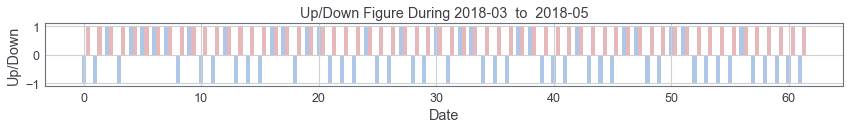

In [14]:
start_date = '2018-03'
end_date = '2018-05'
plot_up_down_figure(close,close, start_date, end_date) # 데이터, 시작일, 끝일

In [15]:
score_df = pd.DataFrame(up_down)
score_df['score'] = 0
score_df.head()

,A035720,score
date,,
2017-06-07,-1.0,0
2017-06-08,1.0,0
2017-06-09,1.0,0
2017-06-12,-1.0,0
2017-06-13,1.0,0


In [92]:
sl=[]
for i in np.arange(len(close.index[1:]))+1:
    score = 0
    start_time = close.index[i-1] + pd.Timedelta('15 hours 30 min')
    start_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    end_time = close.index[i] + pd.Timedelta('15 hours 30 min')
    end_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    title_data = article[start_time : end_time]['title']
    try:
        trans_text = title_data.apply(lambda x : translator.translate(x, dest='en').text)
        sentences = list(trans_text)
        for sentence in sentences:
            ss=sid.polarity_scores(sentence)
            score += ss['compound']
        sl.append(score)
    except:
        sl.append(score)
        continue
    print(score)


4.8274
0.3612
-1.6098
2.5570999999999997
4.3235
1.1995000000000005
1.3022999999999998
0.8585
0.5719
1.8836
0.0
1.3938
0.34
0.4215
0.7636
0.7717
0.45640000000000003
8.3135
2.3666
1.184
1.9616
1.3191
1.2429999999999999
0.2732
0.10069999999999998
0.1406
-0.296
0.7175
1.057
1.2106
2.6357
1.9535
1.5162
0.0
0.5859
1.373
2.1784
1.5633
1.8439999999999999
1.9577
0.23239999999999994
0.0
0.0
0.296
0.4215
5.884000000000001
2.7825999999999995
1.1798
-0.128
3.2651000000000003
0.0
0.0
0.8259000000000001
0.4767
-0.6322999999999999
-0.3818
4.333900000000001
2.2039999999999997
4.032399999999999
1.5203
0.7269
0.7218
0.7804
3.4347999999999996
0.0258
-0.1531
3.8322999999999996
0.7946
0.4659999999999999
0.7491000000000001
1.7783000000000002
3.6547000000000005
0.0
3.1394
1.1118000000000001
0.8931
-0.4118
0.08579999999999999
1.319
0.0
4.9965
4.3745
-0.609
1.2111
1.6783000000000001
0.7003
0.6808
-0.15200000000000002
-0.7906
3.2633
0.35509999999999997
0.128
1.1454
1.8788999999999998
0
0.9769000000000001
0.5719


In [93]:
score_df['score'].iloc[1:] = sl
score_df

c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A035720,score
date,,
2017-06-07,-1.0,0.0000
2017-06-08,1.0,4.8274
2017-06-09,1.0,0.3612
2017-06-12,-1.0,-1.6098
2017-06-13,1.0,2.5571
2017-06-14,-1.0,4.3235
2017-06-15,-1.0,1.1995
2017-06-16,-1.0,1.3023
2017-06-19,1.0,0.8585


하루 데이터로 연습

In [16]:
article_data = article['2018-05-24 15:30' : '2018-05-25 15:30' ]

In [17]:
text = article_data['title']
text

2018-05-25 09:49:00        지도앱 1위는 ‘구글’..1인당 사용시간 1위는 ‘카카오내비’
2018-05-25 04:03:00    [빅데이터로 본 재테크] 카카오·멜론 합병, 엔터 지각변동에 쏠린 눈
2018-05-24 16:09:00                카카오, 블록체인 투자·지주社 '카카오G' 설립
2018-05-24 16:05:00                비씨카드, '카카오T' 고객 대상 캐시백 이벤트
Name: title, dtype: object

In [18]:
trans_text = text.apply(lambda x : translator.translate(x, dest='en').text)
trans_text

2018-05-25 09:49:00    The first place on the map app is 'Google' .. ...
2018-05-25 04:03:00    [Big Tech Data Technology] Merger of Cacao and...
2018-05-24 16:09:00    Cacao established block chain investment holdi...
2018-05-24 16:05:00           BC Card, 'Cacao T' Customer Cashback Event
Name: title, dtype: object

In [19]:
sentences = list(trans_text)
for sentence in sentences:
    print(sentence)
    ss=sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0} : {1},'.format(k,ss[k]),end='')
    print()

The first place on the map app is 'Google' .. First use time per person is 'Cacao navi'
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,
[Big Tech Data Technology] Merger of Cacao and Melon,
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,
Cacao established block chain investment holding company 'Cacao G'
compound : -0.4404,neg : 0.266,neu : 0.734,pos : 0.0,
BC Card, 'Cacao T' Customer Cashback Event
compound : 0.0,neg : 0.0,neu : 1.0,pos : 0.0,


In [20]:
sentences = list(trans_text)
score = 0
for sentence in sentences:
    ss=sid.polarity_scores(sentence)
    score += ss['compound']
score

-0.4404

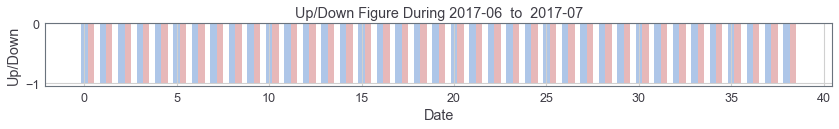

In [21]:
start_date = '2017-06'
end_date = '2017-07'
plot_up_down_figure(close,score_df['score'], start_date, end_date) # 주식데이터, 뉴스 스코어, 시작일, 끝일

# Result

In [94]:
score_df.to_csv(code + 'result.csv')

In [23]:
def get_up_down(data):
    up_down = data.where(data>0)
    up_down[data.where(data>0).dropna().index] = 1
    up_down = up_down.fillna(-1)
    return up_down
    
def get_accuracy(data1,data2):
    up_down1 = get_up_down(data1.pct_change())
    # up_down1 = data1
    up_down2 = get_up_down(data2)
    
    valid = up_down1 + up_down2
    accuracy = len(valid.where(valid!=0).dropna()) / len(valid)
    return accuracy

카카오 정확도

In [24]:
score_df.head()

,A035720,score
date,,
2017-06-07,-1.0,0
2017-06-08,1.0,0
2017-06-09,1.0,0
2017-06-12,-1.0,0
2017-06-13,1.0,0


In [25]:
get_accuracy(score_df.iloc[:,0],score_df.iloc[:,1])

1.0

카카오 0.5245901639344263

기아차 0.5204918032786885

셀트리온 0.5204918032786885

LG화학 0.5491

대한항공 0.4959016393442623

In [59]:
score = pd.read_csv('068270result.csv',index_col=0)
score.index = pd.Series(score.index).apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
price = stock_data['A068270']
df = pd.concat([price,score],ignore_index=True, axis=1)
get_accuracy(df.iloc[:,0],df.iloc[:,1])

0.5204918032786885

In [76]:
def plot_up_down_figure(data1,data2,start_date,end_date):
    fig, ax = plt.subplots(figsize=(12,2))

    bar_width = 0.35

    opacity = 0.8
    error_config = {'ecolor': '0.7'}
    

    up_down1 = get_up_down(data1.pct_change())
    up_down1 = up_down1[start_date:end_date]
    # up_down1 = data1
    up_down2 = get_up_down(data2)
    up_down2 = up_down2[start_date:end_date]

    
    index = np.arange(len(up_down1.index))

    rects1 = ax.bar(index, list(up_down1), bar_width,
                    alpha=opacity, color='b',
                    error_kw=error_config,
                    label='Stock')


    rects2 = ax.bar(index+bar_width, list(up_down2), bar_width,
                    alpha=opacity, color='r',
                    error_kw=error_config,
                    label='News')


    ax.set_xlabel('Date')
    ax.set_ylabel('Up/Down')
    ax.set_title('Up/Down Figure During ' + start_date + '  to  ' + end_date)
    # ax.legend()

    fig.tight_layout()
    plt.show()

셀트리온

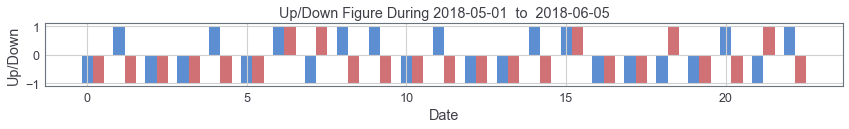

In [79]:
start_date = '2018-05-01'
end_date = '2018-06-05'
plot_up_down_figure(price,pd.Series(score['score'], index=score.index),start_date,end_date)